# chapter6 一般化線形モデル
## section 1 さまざまな確率分布

- 一般化線形モデルでは正規分布以外の確率分布を使うことができる
    - そもそも正規分布以外の確率分布にはどのようなものがあるのか
    - この章では二項分布やポアソン分布など、関わりが深い確率分布の紹介を行う
    
### 用語説明
- 二値確率変数
    - 2つの値しか取らない確率変数のこと
        - コイン(裏表)
- ベルヌーイ試行
    - 2種類の結果のどちらかを発生させる試行
        - コイントスなどが対象
- 成功確率
    - この本では片方の結果が得られる確率を便宜上成功確率と呼ぶ
    - 成功確率は`[0,1]`の範囲
- ベルヌーイ分布
    - 1度のベルヌーイ試行が行われる際に得られる二値確率変数が従う確率分布
        - `P(X=1)=p`,`P(X=0)=1-p`

        
### 二項分布
- 二項分布
    - 成功確率がpであるN回の独立したベルヌーイ試行が行われたときに、成功した回数mが従う離散型の確率分布
    - 二項分布に従う確率変数mについて
        - 期待値はNpと計算される
        - 分散はNp(1-p)と計算される
    - これによって「表が出る確率がpであるコインをN回投げたときに、表がm回出る確率」が計算できる
    - 実際の分析では成功確率pがどのように変換するのかを見るために用いられる
        - 煙草を吸う事によってがんに係る確率がどのように変化するか
        - 値段を変えることに酔って商品の購入率が変化するか
- 二項分布の確率質量関数
    - 二項分布の確率質量関数は以下のように表記される
        - $Bin(m | N, p)={}_N C_m \cdot p^m \cdot (1-p)^{N-m}$
        - (成功確率p, 試行回数N, 成功回数m,二項分布(Binomial distributionの頭文字をとってBin)
    - 試行確率について
        - コインをN回投げてm回pが出る確率は指数を用いて$p^m$と表される
        - もう片方は上記から同様にN-m回投げて(1-p)が出る確率を$(1-p)^{N-m}$と表される
    - 表と裏が混ざっていた場合の順番について
        - 順番は考慮にいれないため順列の考え方を用いる

In [33]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")

import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3

'%.3f'

### 二項分布の実装

In [3]:
# pmfはprobability mass functionの略
sp.stats.binom.pmf(k=1, n=2, p=0.5)

0.500

In [4]:
# 乱数を発生させて表確率20%のコインを10回試行するという試行を5回繰り返す
np.random.seed(98)
sp.stats.binom.rvs(n=10, p=0.2, size=5)

array([3, 2, 1, 3, 2])

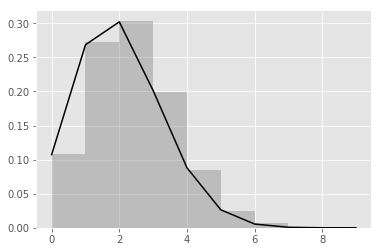

In [7]:
# 乱数のヒストグラムと二項分布の確率質量関数から計算された確率を図示する
# N=10,p=0.2の二項分布
binomial = sp.stats.binom(n = 10, p = 0.2)

# 乱数
np.random.seed(98)
rvs_binomial = binomial.rvs(size = 10000)

# 確率質量関数
m = np.arange(0,10,1)
pmf_binomial = binomial.pmf(k = m)

# 乱数のヒストグラムと確率質量関数を重ねる
sns.distplot(rvs_binomial, bins = m, kde = False, 
             norm_hist = True, color = 'gray')
plt.plot(m, pmf_binomial, color = 'black')

### ポアソン分布
- ポアソン分布
    - 1個2個、1回2回といったカウントデータが従う離散型の確率分布
        - カウントデータなので0以上である必要がある
        - ポアソン分布の母数は強度(事象の起こりやすさ)$\lambda$のみ。ポアソン分布に従う確率変数はその期待値も分散も$\lambda$と等しくなる。
- 使い道
    - あるパラメータが変更することによって他のパラメータがどれだけ変化するかを調べるため
- ポアソン分布の確率質量関数
    - $Pois(x | \lambda) = \frac{e^{-\lambda}\lambda^x}{x!}$
    - xはカウントデータなどの離散型の確率変数、$\lambda$はポアソン分布の強度
- ポアソン分布と二項分布の関係
    - ポアソン分布は二項分布から導出することができる
        - ポアソン分布はp→0, N→∞という条件のもとNp=λとした結果にみなせる
        - つまり「成功確率が限りなく0に近いが、試行回数が限りなく多い二項分布」
        - 上記条件に近いような事象はたくさんあるのでそういうものに応用できると良い
            - 1日の交通事故死傷者数
                - 事故に巻き込まれる対象→すべての人類なのでNは限りなく多い
                - 実際に事故に巻き込まれる確率→限りなく低い(p→0)
            - イベント期間中のミリシタで担当の限定SSRを引いたP数
                - ガチャを引いて出てくる対象→すべてのキャラクターなのでNは限りなく多い？
                - 実際に担当限定SSRを引く確率→SSRで3%、担当限定SSR(ピックアップ時)0.495%→まぁ低い
                    - ちなみにピックアップなしなら0.04%→限りなく低い？

### ポアソン分布の実装

In [8]:
# ポアソン分布の確率質量関数
sp.stats.poisson.pmf(k = 2, mu = 5)

0.084

In [10]:
# λ=2のポアソン分布に従う乱数
np.random.seed(98)
sp.stats.poisson.rvs(mu = 2, size = 5)

array([2, 2, 2, 0, 3])

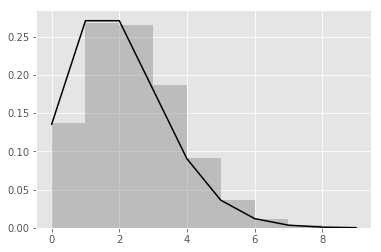

In [11]:
# λ=2のポアソン分布
poisson = sp.stats.poisson(mu = 2)

# 乱数
np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)

# 確率質量関数
pmf_poisson = poisson.pmf(k = m)

# 乱数のヒストグラムと確率質量関数を重ねる
sns.distplot(rvs_poisson, bins = m, kde = False, 
             norm_hist = True, color = 'gray')
plt.plot(m, pmf_poisson, color = 'black')

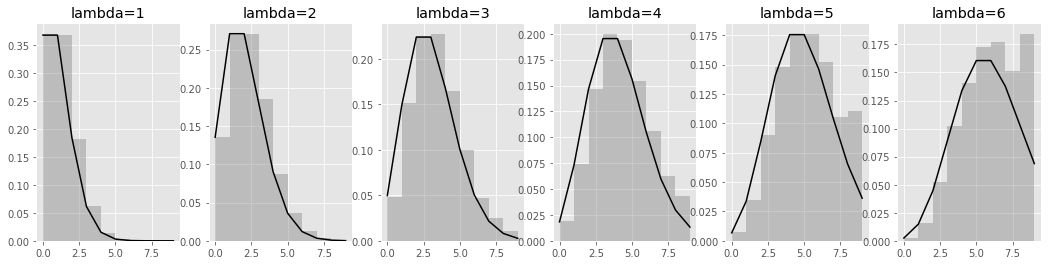

In [31]:
# 強度を変えてplotしてみる
def poisson(lamb):
    poisson = sp.stats.poisson(mu = lamb)

    # 乱数
    np.random.seed(98)
    rvs_poisson = poisson.rvs(size = 10000)

    # 確率質量関数
    pmf_poisson = poisson.pmf(k = m)
    
    return rvs_poisson, pmf_poisson
    
fig, ax = plt.subplots(ncols=6, figsize=(18,4))
for i in range(1,7):
    r_p, p_p = poisson(i)
    # 乱数のヒストグラムと確率質量関数を重ねる
    dummy = sns.distplot(r_p, bins = m, kde = False, 
                 norm_hist = True, color = 'gray', ax=ax[i-1])
    ax[i-1].plot(m, p_p, color = 'black')
    ax[i-1].set_title("lambda={}".format(i))

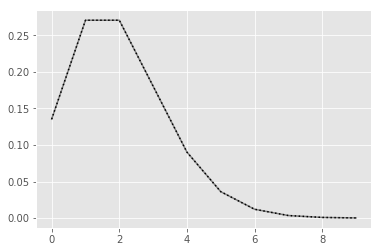

In [32]:
# Nが大きくpが小さい二項分布
N = 100000000
p = 0.00000002
binomial_2 = sp.stats.binom(n = N, p = p)

# 確率質量関数
pmf_binomial_2 = binomial_2.pmf(k = m)

# 確率質量のグラフ
plt.plot(m, pmf_poisson, color = 'gray')
plt.plot(m, pmf_binomial_2, color = 'black', 
         linestyle = 'dotted')

- その他の確率分布
    - 負の二項分布
        - ポアソン分布と同じカウントデータが従う確率分布だが、分散が大きいこと。
            - 例：群れをなす生物の個体の場合、ポアソン分布では想定できないような大きな分散(過分散)になることがある。
    - ガンマ分布
        - 0以上の値を取る連続型の確率分布が従う確率分布
        - 正規分布と異なって0以上の値しか取らず、分散の値も平均値によって変化する(not等分散)
    - 指数型分布族
        - 一般化線形モデルで正規分布以外の確率分布として用いられるのが指数型分布族
        - 正規分布の持つ多くの特性を持つためモデルの推定や解釈が用意になる
        - $f(x | \theta) = \exp{[a(x)b(\theta) + c(\theta) + d(x)]}$
            - ここでa(x)=xである分布を正準系とよびb(θ)を分布の自然パラメタと呼ぶ
            - ポアソン分布は該当する

## section 2 一般化線形モデルの基本
- この章では一般化線形モデルの基本を説明
    - 母集団分布に正規分布を仮定することが難しいものに対して、一般化線形モデル(Generalized Linear Models:GLM)を使うことで分類問題や回帰問題を統一的に取り扱うことができる

### 一般化線形モデルの構成要素
- 一般化線形モデルは以下の3つを構成要素に持つ
    1. 母集団の従う確率分布
        - これまでの説明から一般化線形モデルは正規分布を始め、二項分布やポアソン分布などに適用できる
    2. 線形予測子
        - 線形予測子とは、説明変数を線形の関係式で表現したもの
        - ビールの販売個数という目的変数を気温という説明変数から予測する場合は以下のようになる
            - $\beta_0 + \beta_1 \cdot 気温(℃)$
    3. リンク関数
        - 目的変数と線形予測子の対応を取るために使用される
        - 上記のビール販売個数の場合、マイナスになることは絶対にないためリンク関数を適用させることで条件を満たすことができる
            - $ビールの販売個数=\beta_0 + \beta_1 \cdot 気温(℃)$
            - マイナスにならないように以下に対数を適用
                - $\log{ビールの販売個数}=\beta_0 + \beta_1 \cdot 気温(℃)$
                
- リンク関数と確率分布の対応
    - 恒等関数は$f(x) = x$となるような値が変換しない関数
    - ロジット関数については次章で

|確率分布|リンク関数|モデル名|
|---|---|---|
|正規分布|恒等関数($f(x) = x$)|正規線形モデル|
|二項分布|ロジット関数|ロジスティック回帰|
|ポアソン分布|対数関数|ポアソン回帰|

- 一般化線形モデルのパラメータ推定
    - 推定には最尤法に寄るパラメータ推定が行われる
        - 犬度関数の形については個別のモデルを扱う際に解説
        - パラメータ推定のアルゴリズムとしては**反復重み付き最小二乗法**を用いることが多い
    - 検定手法
        - この本ではモデル選択においてAICを用いるが他にもあるため3つ紹介
            - Wald検定
                - サンプルサイズが大きく、推定値が正規分布にしたがうことを利用した検定手法
            - 犬度比検定
                - 考え方が分散分析と同じで、モデルの当てはまり具合を比較する手法
            - スコア検定
                - 対数尤度関数の 1 次導関数（すなわち、接線の傾き）を利用した手法
                - あんまり使われない
        - 詳しい説明
            > https://stats.biopapyrus.jp/glm/glm-test.html